IndexError: too many indices for array: array is 2-dimensional, but 4 were indexed

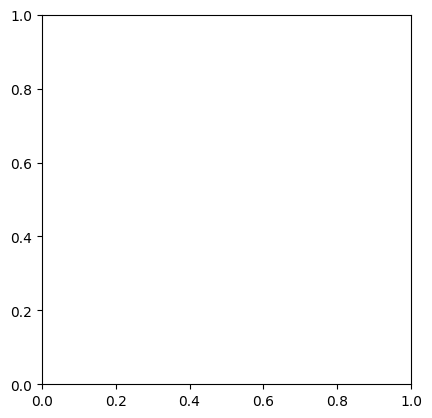

In [4]:
#mesh generation:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

# Define parameters
nx = 91
ny = 101
r1 = 1
r2 = 2

# Generate coordinates
coordinates = np.array([[r*np.cos(theta), r*np.sin(theta)] for r in np.linspace(r1, r2, ny) 
                        for theta in np.linspace(0, np.pi, nx)])

# Generate incidents
incidents = []
for i in range(1, nx):
    for j in range(1, ny):
        idx = (j-1)*nx + i
        incidents.extend([(idx, idx+1, idx+nx+1, idx+nx)])

# Plotting
fig, ax = plt.subplots()
ax.set_aspect('equal')

# Plot inner mesh
for incident in incidents:
    polygon = Polygon(coordinates[incident], closed=True, fill=None, edgecolor='black')
    ax.add_patch(polygon)

# Show plot
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Inner Mesh')
plt.grid(True)
plt.show()


In [ ]:
#boundary mesh generation:
import numpy as np
from shapely.geometry import LineString, Polygon
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt

# Define parameters
w = 8
h = 8
pmlWidth = 2
r2 = 2

# Create rectangle boundary
rectangle = Rectangle((-w/2, 0), w/2 + pmlWidth, h/2 + pmlWidth)

# Get boundary coordinates
bmesh_coords = np.array(rectangle.get_path().vertices)

# Create inner mesh
inner_coords = np.array([[x, y] for x, y in innerMesh.points if np.linalg.norm([x, y]) >= r2])

# Combine inner and boundary mesh coordinates
coordinates = np.vstack([inner_coords, bmesh_coords])

# Find shortest tour
line = LineString(coordinates)
shortest_tour = np.array(line.minimum_rotated_rectangle.exterior.xy).T

# Plot outer boundary
fig, ax = plt.subplots()
ax.plot(shortest_tour[:, 0], shortest_tour[:, 1], 'r-')
ax.set_aspect('equal', 'box')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Outer Boundary')
plt.grid(True)
plt.show()


In [ ]:
#boundary outsider
import numpy as np
import meshpy.triangle as triangle
import matplotlib.pyplot as plt

# Get inner and outer coordinates
inner_coords = np.array(innerMesh.points)
outer_coords = np.array(outerMesh.points)

# Combine inner and outer coordinates
combined_coords = np.vstack((outer_coords, inner_coords))

# Get inner and outer mesh elements
inner_elements = np.array([[v + len(outer_coords) for v in cell] for cell in innerMesh.cells])
outer_elements = np.array(outerMesh.cells)

# Combine inner and outer mesh elements
combined_elements = np.vstack((outer_elements, inner_elements))

# Create a mesh generator object
mesh_info = triangle.MeshInfo()
mesh_info.set_points(combined_coords)
mesh_info.set_facets([(i, i+1) for i in range(len(outer_coords)-1)] + [(len(outer_coords)-1, 0)])

# Generate the mesh
mesh = triangle.build(mesh_info, max_volume=0.01, min_angle=25)

# Extract mesh points and elements
points = np.array(mesh.points)
elements = np.array(mesh.elements)

# Plot the mesh wireframe
fig, ax = plt.subplots()
for element in elements:
    polygon = plt.Polygon(points[element], closed=True, fill=None, edgecolor='black')
    ax.add_patch(polygon)

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Combined Mesh Wireframe')
plt.grid(True)
plt.show()

# Change mesh order to 2
mesh.order = 2

In [ ]:
# boundary condition:
import numpy as np
from scipy.integrate import acoustic_radiation_value

# Define parameters
pIn = 1
w = 8
c = 343  # Speed of sound in air (m/s)
rho = 1.2  # Density of air (kg/m^3)

# Define variables
vars = ['p(x, y)', 'omega', ['x', 'y']]

# Calculate acoustic radiation value
gamma_in = acoustic_radiation_value(-w/2, vars, {'MassDensity': rho, 'SoundSpeed': c},
                                    {'SoundIncidentPressure': pIn, 'BoundaryUnitNormal': [-1, 0, 0]})

print("Acoustic Radiation Value at x = -w/2:", gamma_in)


In [ ]:
# non acoustic cloaking material cover:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Define parameters
c_water = 1482  # Speed of sound in water (m/s)
rho_water = 1000  # Density of water (kg/m^3)
f = 800  # Frequency (Hz)
omega = 2 * np.pi * f  # Angular frequency

# Define the PDE equation (replace with actual PDE)
def frequency_pml_model(x, y, omega):
    return ...

# Define the gamma_in boundary condition (replace with actual calculation)
def gamma_in(x, y):
    return ...

# Define the PDE
def pde(x, y, omega):
    return frequency_pml_model(x, y, omega) - gamma_in(x, y)

# Solve the PDE (replace with actual solver)
def solve_pde():
    return ...

# Generate contour plots over time
def generate_contour_plots(solution):
    # Generate contour plot for each time step
    plots = []
    for t in np.linspace(0, 0.002, num=50):
        # Get solution at time t
        sol_t = solution(t)
        
        # Generate contour plot (replace with actual plotting)
        plot = plt.contourf(sol_t, ...)
        
        # Append plot to list
        plots.append(plot)
    
    return plots

# Create animation
def animate_contour_plots(plots):
    fig, ax = plt.subplots()
    anim = FuncAnimation(fig, lambda i: plots[i], frames=len(plots))
    return anim

# Solve the PDE
solution = solve_pde()

# Generate contour plots
plots = generate_contour_plots(solution)

# Create and display animation
animation = animate_contour_plots(plots)
plt.show()


In [ ]:
#acoustic cloaking material cover:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from matplotlib.animation import FuncAnimation

# Define parameters
thickness = 2 / 100
r1 = 1
r2 = 2
w = 8
h = 8
c_water = 1482
rho_water = 1000
f = 800
omega = 2 * np.pi * f

# Define functions
def r(x, y):
    return np.sqrt(x**2 + y**2)

def rho_1(x, y):
    return (r(x, y) + np.sqrt(2 * r1 * r(x, y) - r1**2)) / (r(x, y) - r1) * rho_water

def c_1(x, y):
    return (r2 - r1) / r2 * r(x, y) / (r(x, y) - r1) * c_water

def rho_2(x, y):
    return (rho_water**2) / rho_1(x, y)

def c_2(x, y):
    return c_1(x, y)

def layer_number(x, y):
    r = np.sqrt(x**2 + y**2)
    if r <= r1:
        return 1
    elif r1 < r <= r2:
        return np.ceil((r - r1) / thickness)
    else:
        return 51

# Define the PDE equation
def pde(x, y, omega):
    layer_num = layer_number(x, y)
    c_val = c_water if layer_num > 50 else (c_1(x, y) if layer_num % 2 != 0 else c_2(x, y))
    rho_val = rho_water if layer_num > 50 else (rho_1(x, y) if layer_num % 2 != 0 else rho_2(x, y))
    return frequency_pml_model(x, y, omega) - gamma_in(x, y, omega, c_val, rho_val)

# Solve the parametric PDE
def solve_pde():
    return solve_ivp(pde, [x_start, x_end], [y_start, y_end], t_eval=[omega], method='RK45', args=(omega,))

# Generate contour plots over time
def generate_contour_plots(solution):
    plots = []
    for t in np.linspace(0, 0.002, num=50):
        sol_t = solution(t)
        plot = plt.contourf(sol_t, ...)
        plots.append(plot)
    return plots

# Create animation
def animate_contour_plots(plots):
    fig, ax = plt.subplots()
    anim = FuncAnimation(fig, lambda i: plots[i], frames=len(plots))
    return anim

# Solve the PDE
solution = solve_pde()

# Generate contour plots
plots = generate_contour_plots(solution)

# Create and display animation
animation = animate_contour_plots(plots)
plt.show()


In [ ]:
# |p|-|pin|
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.colorbar import ColorbarBase
from matplotlib.cm import ScalarMappable

# Assuming SolWithCloak is your solution array
# Define the plot parameters
plot_range = (-0.2, 0.2)
contour_levels = 30
plot_points = 41
legend_label = "[Pa]"
legend_ticks = np.linspace(plot_range[0], plot_range[1], num=6)
legend_tick_labels = [f"{tick:.1f}" for tick in legend_ticks]

# Create contour plot
contour_plot = plt.contourf(X, Y, np.abs(SolWithCloak) - pIn, levels=contour_levels, cmap='coolwarm', vmin=plot_range[0], vmax=plot_range[1])

# Add colorbar
colorbar = plt.colorbar(contour_plot, ticks=legend_ticks, orientation='vertical')
colorbar.ax.set_ylabel(legend_label)
colorbar.ax.set_yticklabels(legend_tick_labels)

# Add boundary highlights (assuming you have boundary information)
circle = plt.Circle((0, 0), r1, fill=False, linestyle='solid')
plt.gca().add_patch(circle)
plt.plot([-r1, -w/2, -w/2, w/2, w/2, r1], [0, 0, h/2, h/2, 0, 0])

# Set labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Pressure Amplitude Deviation')

plt.gca().set_aspect('equal', adjustable='box')
plt.show()
